<a href="https://colab.research.google.com/github/AdRavi89/Belajar-Newbie-PYTHON/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Nama : Agung Dwi Susilo
###NIM : G.231.22.0038

# 1. Business Understanding
Tujuan dari Proses mining ini adalah :
*   Mengetahui Algoritma Machine Learning terbaik untuk klasifikasi diagnosis penyakit kangker payudara
*   Algoritma machine learning yang akan dibangingkan adalah K-Nin, Naive Bayes, dan Cecision Tree



# 2. Data Understanding

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining & Science/breast-cancer-wdbc.csv'

data = pd.read_csv(data_path)

#Menampilkan 5 data teratas
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
#melihat tipe data masing-masing atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 3. Data Preparation

###3.1 Data Prepocessing

In [15]:
# Mengecek Missing Value
data.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
# Periksa jumlah baris sebelum proses
print("Jumlah baris awal:", data.shape[0])

# Tangani nilai NaN
if data.isnull().values.any():
    print("Dataset mengandung nilai NaN, menggantinya dengan 0")
    data = data.fillna(0)  # Ganti NaN dengan 0
else:
    print("Tidak ada nilai NaN dalam dataset")

# Menghapus kolom 'id' jika ada
if 'id' in data.columns:
    data = data.drop(['id'], axis=1)
    print("Kolom 'id' telah dihapus")
else:
    print("Kolom 'id' tidak ditemukan dalam dataset")

# Periksa jumlah baris setelah proses
print("Jumlah baris setelah proses:", data.shape[0])

# Tampilkan 5 baris pertama
print(data.head())


Jumlah baris awal: 569
Dataset mengandung nilai NaN, menggantinya dengan 0
Kolom 'id' telah dihapus
Jumlah baris setelah proses: 569
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0

In [16]:
# Data Reduction: Menghilangkan atribut id
# data = data.dropna()  # Menghapus baris dengan nilai NaN
data = data.drop(['id'], axis=1)  # Menghapus kolom 'id'

# Menampilkan 5 baris pertama
print(data.head())


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [17]:
# Data Transformation: Mengubah nilai pada atribut diagnosis
# Mengganti nilai 'M' (Malignant) pada kolom diagnosis menjadi angka 4
data = data.replace("M", 4)
# Mengganti nilai 'B' (Benign) pada kolom diagnosis menjadi angka 2
data = data.replace("B", 2)
# Menampilkan 5 baris pertama dari dataset yang telah diubah
data.head()

<ipython-input-17-92572395910d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("B", 2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,4,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,4,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,4,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 3.2 Exploratory Data Analysus (EDA)

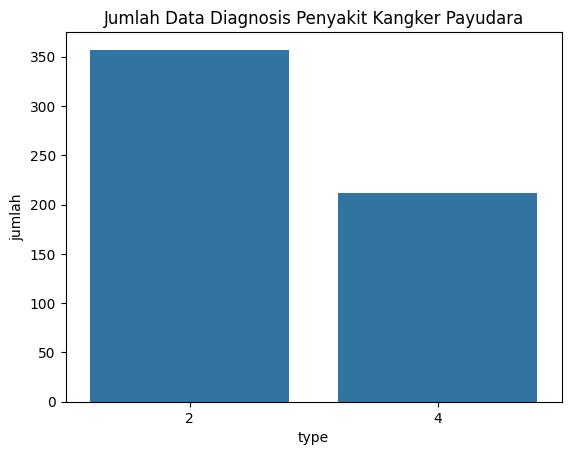

In [18]:
# Membuat plot untuk analisis univariat diagnosis kanker payudara
plt.title("Jumlah Data Diagnosis Penyakit Kangker Payudara")  # Menambahkan judul pada grafik
sns.countplot(x=data['diagnosis'])  # Membuat plot hitung (countplot) untuk menghitung jumlah setiap kategori pada kolom 'diagnosis'
plt.xlabel('type')  # Memberikan label pada sumbu X
plt.ylabel('jumlah')  # Memberikan label pada sumbu Y
plt.show()  # Menampilkan grafik


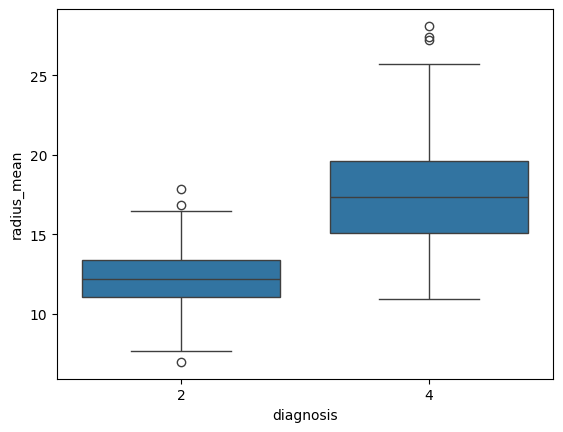

In [19]:
# Bivariate Analysis: Menganalisis hubungan antara diagnosis dan radius_mean
# Membuat boxplot untuk melihat distribusi 'radius_mean' berdasarkan kategori 'diagnosis'
sns.boxplot(x="diagnosis", y="radius_mean", data=data)
# Menampilkan grafik
plt.show()

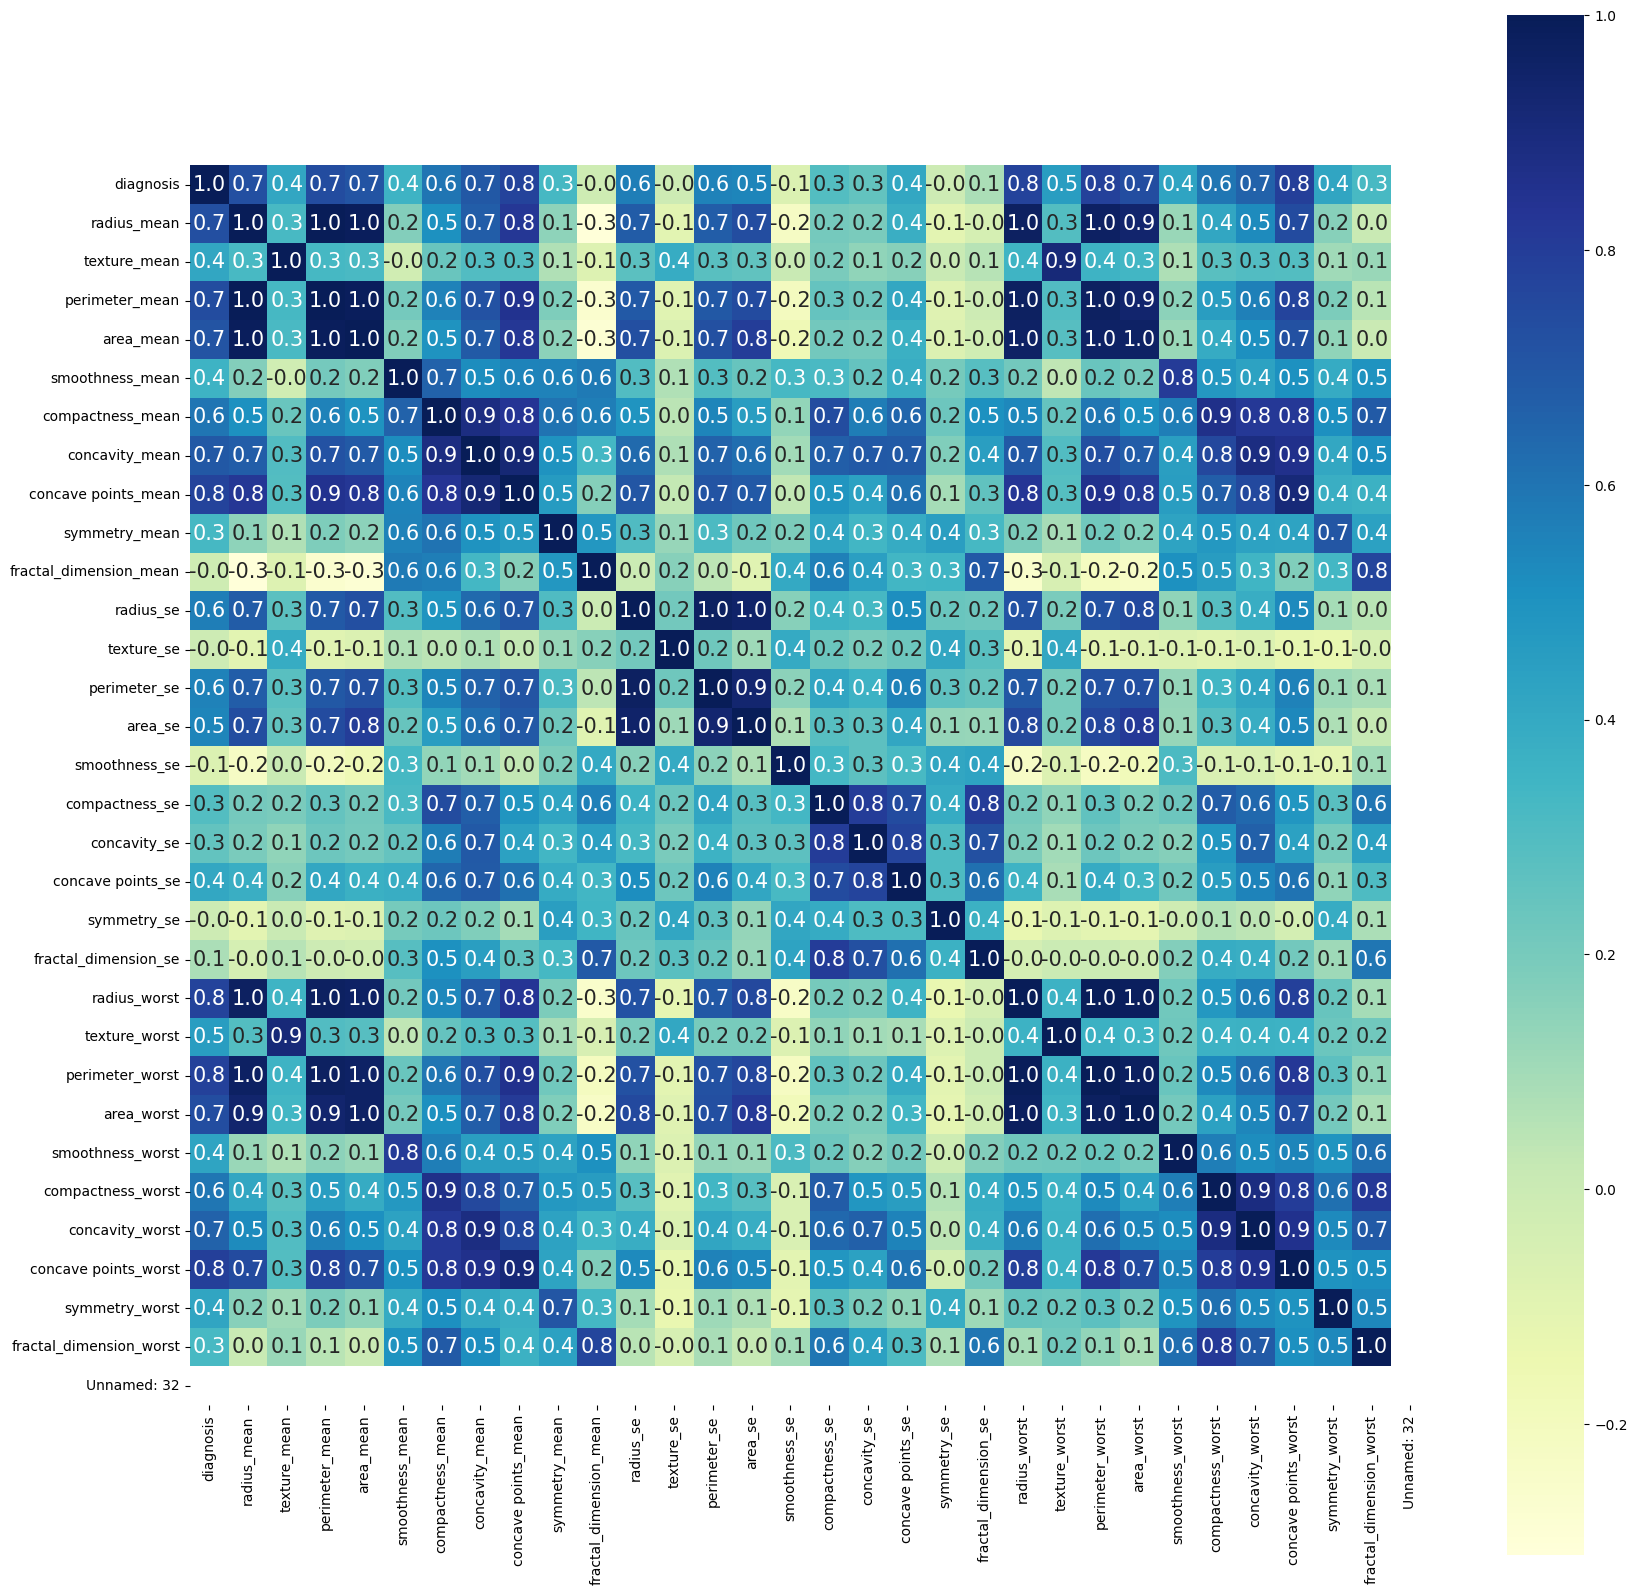

In [20]:
# Multivariate Analysis: Menganalisis hubungan antar atribut dengan matriks korelasi
korelasi = data.corr()  # Menghitung matriks korelasi antar kolom numerik dalam dataset

plt.figure(figsize=(20, 20))  # Menentukan ukuran figure untuk heatmap
sns.heatmap(
    korelasi,  # Data matriks korelasi
    cbar=True,  # Menampilkan color bar di sebelah heatmap
    square=True,  # Memastikan setiap sel dalam heatmap berbentuk persegi
    fmt='.1f',  # Format angka dalam sel (1 angka desimal)
    annot=True,  # Menampilkan nilai korelasi dalam setiap sel
    annot_kws={'size': 15},  # Mengatur ukuran teks dalam sel
    cmap='YlGnBu'  # Menggunakan skema warna YlGnBu (Yellow-Green-Blue)
)
plt.show()  # Menampilkan heatmap


# 4. Modeling

In [21]:
# Import modul untuk membagi dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split

# Import modul untuk menghitung nilai akurasi dari masing-masing algoritma
from sklearn.metrics import accuracy_score



In [22]:
# Memisahkan atribut biasa dengan atribut spesial (class)

x = data.drop(columns='diagnosis')
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
# atribut spesial (class)

y = data['diagnosis']
y.head()

,diagnosis
0,4
1,4
2,4
3,4
4,4


In [24]:
# split data menjadi data training dan data testing

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=0)

###Algoritma K-NN

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Membuat pipeline dengan imputer dan model KNN
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi NaN dengan mean
    ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance', p=2))  # Model KNN
])

# Melakukan training
pipeline.fit(xtrain, ytrain)

# Melakukan prediksi
ypred = pipeline.predict(xtest)

# Menghitung akurasi
from sklearn.metrics import accuracy_score
print("Akurasi:", accuracy_score(ytest, ypred))


Akurasi: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Algoritma Naive Bayes

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes

# Membuat pipeline dengan imputer dan model Naive Bayes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi NaN dengan mean
    ('naive_bayes', GaussianNB())  # Model Gaussian Naive Bayes
])

# Melakukan training
pipeline.fit(xtrain, ytrain)

# Melakukan prediksi
ypred = pipeline.predict(xtest)

# Menghitung akurasi
from sklearn.metrics import accuracy_score
print("Akurasi:", accuracy_score(ytest, ypred))


Akurasi: 0.9239766081871345


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Algoritma Decision Tree

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier

# Membuat pipeline dengan imputer dan model Decision Tree
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi NaN dengan mean
    ('decision_tree', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))  # Model Decision Tree
])

# Melakukan training
pipeline.fit(xtrain, ytrain)

# Melakukan prediksi
ypred = pipeline.predict(xtest)

# Menghitung akurasi
from sklearn.metrics import accuracy_score
print("Akurasi:", accuracy_score(ytest, ypred))


Akurasi: 0.9298245614035088


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### 5. Evaluation

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Menggunakan SimpleImputer untuk menangani NaN dalam data
imputer = SimpleImputer(strategy='mean')  # Mengisi NaN dengan rata-rata

# Imputasi pada xtrain dan xtest
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

# Definisikan model-model yang akan digunakan
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2, metric='minkowski')
nb = GaussianNB()
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Menyusun model dalam list
models = [knn, nb, dt]

# List untuk menyimpan hasil akurasi
nilai_akurasi = []

# Melakukan training dan evaluasi untuk setiap model
for model in models:
    # Melakukan training
    model.fit(xtrain, ytrain)

    # Melakukan prediksi
    ypred = model.predict(xtest)

    # Menghitung akurasi
    akurasi = accuracy_score(ytest, ypred)

    # Menambahkan akurasi ke list
    nilai_akurasi.append(akurasi)

# Menampilkan nilai akurasi untuk setiap model
print("Nilai Akurasi dari setiap model:")
print("K-NN: {:.4f}".format(nilai_akurasi[0]))
print("Naive Bayes: {:.4f}".format(nilai_akurasi[1]))
print("Decision Tree: {:.4f}".format(nilai_akurasi[2]))


Nilai Akurasi dari setiap model:
K-NN: 0.9474
Naive Bayes: 0.9240
Decision Tree: 0.9298


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


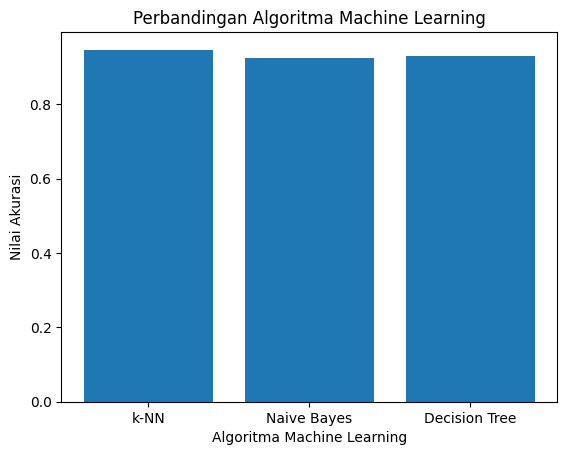

In [30]:
plt.bar(['k-NN', 'Naive Bayes', 'Decision Tree'], nilai_akurasi)
plt.title("Perbandingan Algoritma Machine Learning")
plt.xlabel("Algoritma Machine Learning")
plt.ylabel("Nilai Akurasi")
plt.show()

#6. Deployment

Akan menerapkan **Algoritma K-NN** untuk klasifikasi diagnosis penyakit kangker ppayudara